In [1]:
from scipy.constants import pi 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Free parameters, typical setup for a HeNe laser (https://sites.astro.caltech.edu/~lah/ay105/pdf/Laser-Guide.pdf, page 8)

w_0 = 0.13 * 10**-3 # Beam waist (0.13 mm)
n = 1 # Refractive index of air
wavelength = 633 * 10**-9 # 633 nanometers (red light)
I_0 = 1 # Irradiance (W/m^2), some arbitrary value for visualization
z_R = pi * w_0**2 * n / wavelength # Rayleigh range

In [3]:
def w(z):
    return w_0 * np.sqrt(1+ np.power(z/z_R, 2))

def I(r, z):
    return I_0 * (w_0/w(z))**2 * np.exp(-2*r**2/w(z)**2)

In [4]:
# Generate heatmap data
z_values = np.linspace(-5*z_R, 5*z_R, 400)
r_values = np.linspace(-3*w_0, 3*w_0, 200)
Z, R = np.meshgrid(z_values, r_values)
I_values = I(R, Z)

I_values.shape

(200, 400)

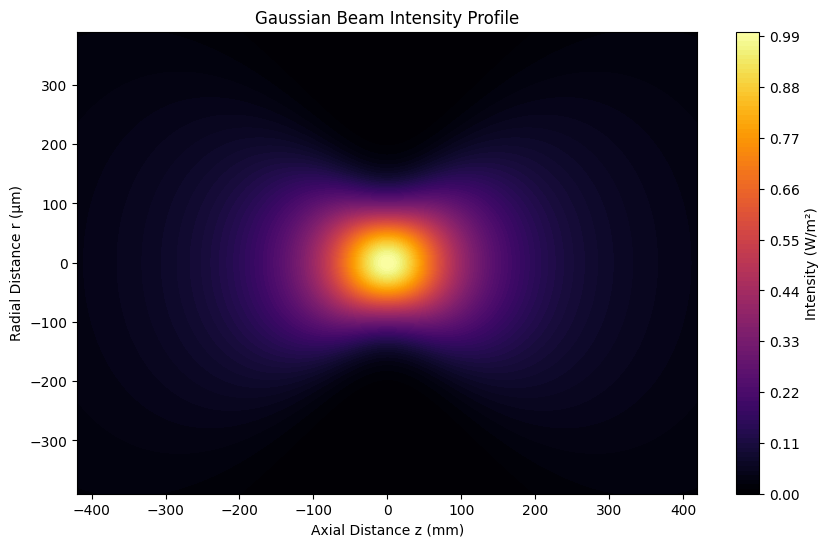

In [5]:
# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(Z*1e3, R*1e6, I_values, levels=100, cmap='inferno')
plt.colorbar(label='Intensity (W/m²)')
plt.xlabel('Axial Distance z (mm)')
plt.ylabel('Radial Distance r (µm)')
plt.title('Gaussian Beam Intensity Profile')
plt.show()